# Homework 2 - CSCI 7000
## Behzod Mirpochoev

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Problem 1

In [2]:
def sis(s, i, beta, gamma, time, dt):

    t = np.arange(0, time+dt, dt)                  
    s_fe = [s] 
    i_fe = [i]
    i_a = (1 - (gamma/beta)) / (1 + ((1 - (gamma/beta) - i) / i) * np.exp(-(beta - gamma) * t))

    for _ in range(1,len(t)): 
        s_fe.append(s_fe[-1] + dt * (-(beta * s_fe[-1] * i_fe[-1]) + (gamma * i_fe[-1])))
        i_fe.append(i_fe[-1] + dt * (beta * s_fe[-2] * i_fe[-1] - (gamma * i_fe[-1])))

    plt.plot(t, i_fe, color = 'red', label = 'Forward Euler Behzod')
    plt.plot(t, i_a, 'k--', label = 'Analytical Behzod')
    plt.plot(t, len(t)*[1-(gamma/beta)], 'k', alpha = 0.7, label = 'DEE Behzod') # sanity check
    plt.xlabel('time')
    plt.ylabel('fraction of population')
    plt.title(r'$\Delta t$ = {}'.format(dt))
    plt.legend()
    plt.ylim(0,0.5)
    plt.xlim(0,time)
    plt.show()

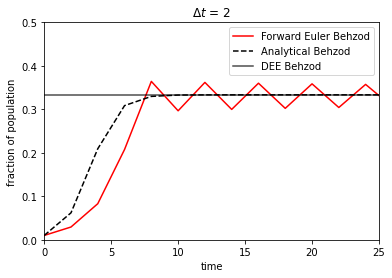

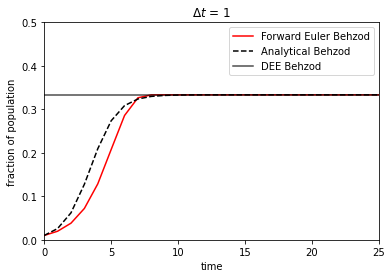

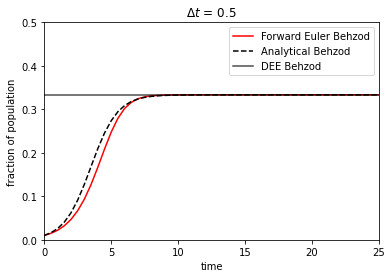

In [3]:
sis(0.99, 0.01, 3, 2, 25, 2)
sis(0.99, 0.01, 3, 2, 25, 1)
sis(0.99, 0.01, 3, 2, 25, 0.5)

In [4]:
def sis_maxabserror(s, i, beta, gamma, time, dt):

    t = np.arange(0, time+dt, dt)                  
    s_fe = [s] 
    i_fe = [i]
    i_a = (1 - (gamma/beta)) / (1 + ((1 - (gamma/beta) - i) / i) * np.exp(-(beta - gamma) * t))

    for _ in range(1,len(t)): 
        s_fe.append(s_fe[-1] + dt * (-(beta * s_fe[-1] * i_fe[-1]) + (gamma * i_fe[-1])))
        i_fe.append(i_fe[-1] + dt * (beta * s_fe[-2] * i_fe[-1] - (gamma * i_fe[-1])))

    return np.max(np.abs(i_fe - i_a))

In [5]:
maxabserror1 = sis_maxabserror(0.99, 0.01, 3, 2, 25, 2)
maxabserror2 = sis_maxabserror(0.99, 0.01, 3, 2, 25, 1)
maxabserror3 = sis_maxabserror(0.99, 0.01, 3, 2, 25, 0.5)
print(f'maxabserror for dt = 2: {maxabserror1}') 
print(f'maxabserror for dt = 1: {maxabserror2}') 
print(f'maxabserror for dt = 0.5: {maxabserror3}') 

maxabserror for dt = 2: 0.1263393498870075
maxabserror for dt = 1: 0.08077107437456943
maxabserror for dt = 0.5: 0.04283504637204699


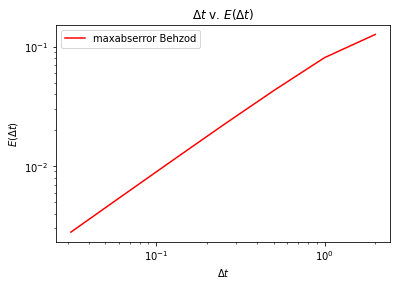

In [6]:
dts = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
E = []

for dt in dts:
    E.append(sis_maxabserror(0.99, 0.01, 3, 2, 25, dt))

plt.loglog(dts, E, color = 'red', label = 'maxabserror Behzod')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$E(\Delta t)$')
plt.title(r'$\Delta t$ v. $E(\Delta t)$')
plt.legend()
plt.show()

### Problem 2

In [7]:
def aon(s, i, r, time, dt, R0):
    t = np.arange(0, time+dt, dt)
    gamma = 1/14
    beta = gamma * R0
    s = [s]
    i = [i]
    r = [r]
    v_null = [0.1]
    style = {3: '--', 4: '-.', 5: '-'}

    for _ in range(1,len(t)): 
        s.append(s[-1] + dt * (-beta * s[-1] * i[-1]))
        i.append(i[-1] + dt * (beta * s[-2] * i[-1] + beta * v_null[-1] * i[-1] - gamma * i[-1]))
        r.append(r[-1] + dt * (gamma * i[-2]))
        v_null.append(v_null[-1] + dt * (-beta * v_null[-1] * i[-2]))
    
    plt.title('All-or-Nothing Vaccination Model')
    plt.plot(t, i, color = 'red', linestyle = style[R0], label = f'i (R0:{R0}) Behzod')
    plt.plot(t, r, color = 'black', linestyle = style[R0], label = f'r (R0:{R0}) Behzod')
    plt.legend(loc='center right')
    plt.xlabel('time')
    plt.ylabel('frac. of pop.')
    print(f'{r[-1]*100}% of pop. got infected total for all or nothing and R0 = {R0}')
    print(f'That is {round(r[-1] * 300000)} people!')
    print('------------------------------')

In [8]:
def leaky(s, i, r, time, dt, R0):
    t = np.arange(0, time+dt, dt)
    gamma = 1/14
    beta = gamma * R0
    s = [s]
    i = [i]
    r = [r]
    v = [0.5]
    style = {3: '--', 4: '-.', 5: '-'}

    for _ in range(1,len(t)): 
        s.append(s[-1] + dt * (-beta * s[-1] * i[-1]))
        i.append(i[-1] + dt * (beta * s[-2] * i[-1] + beta * v[-1] * i[-1] * (0.2) - gamma * i[-1]))
        r.append(r[-1] + dt * (gamma * i[-2]))
        v.append(v[-1] + dt * (-beta * v[-1] * i[-2] * (0.2)))
        
    plt.title('Leaky Vaccination Model')
    plt.plot(t, i, color = 'red', linestyle = style[R0], label = f'i (R0:{R0}) Behzod')
    plt.plot(t, r, color = 'black', linestyle = style[R0], label = f'r (R0:{R0}) Behzod')
    plt.legend(loc='center right')
    plt.xlabel('time')
    plt.ylabel('frac. of pop.')
    print(f'{r[-1]*100}% of pop. got infected total for leaky and R0 = {R0}')
    print(f'That is {round(r[-1] * 300000)} people!')
    print('------------------------------')

44.15367400499276% of pop. got infected total for all or nothing and R0 = 3
That is 132461 people!
------------------------------
52.98867179842035% of pop. got infected total for all or nothing and R0 = 4
That is 158966 people!
------------------------------
56.69205624117672% of pop. got infected total for all or nothing and R0 = 5
That is 170076 people!
------------------------------


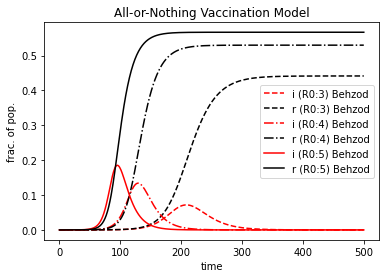

54.1085010334757% of pop. got infected total for leaky and R0 = 3
That is 162326 people!
------------------------------
67.7940896184912% of pop. got infected total for leaky and R0 = 4
That is 203382 people!
------------------------------
75.58046697615195% of pop. got infected total for leaky and R0 = 5
That is 226741 people!
------------------------------


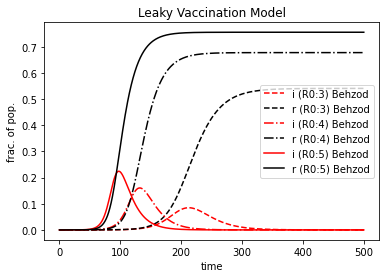

In [9]:
aon((0.5 - 1/300000),1/300000,0,500,1,3)
aon((0.5 - 1/300000),1/300000,0,500,1,4)
aon((0.5 - 1/300000),1/300000,0,500,1,5)
plt.show()

leaky((0.5 - 1/300000),1/300000,0,500,1,3)
leaky((0.5 - 1/3000000),1/300000,0,500,1,4)
leaky((0.5 - 1/300000),1/300000,0,500,1,5)